In [ ]:
#Install packages
!pip install rasterio
!pip install rastertodataframe
!pip install pyproj
!pip install geopandas
!pip install osgeo

In [2]:
#Import Base Libraries
import pandas as pd
import numpy as np
import glob

#Import Raster Libraries
import rasterio
from rastertodataframe import raster_to_dataframe

#Import Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from rasterio.plot import show

In [3]:
#Mount to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Area Tiff Files

Read in Tiff files of area and merge.

In [4]:
#function to turn tiff to df
def tiff_to_df_colab(path):
  """
  Input - File path that contains tiff files
  Output - Pandas dataframe of all raster layer values 
  """
  #Create folder path and list variables
  folder_path = path
  file_list = glob.glob(folder_path + "/*.tiff")

  #initiate empty dataframe
  main_dataframe = pd.DataFrame()

  for i in file_list:
    data = raster_to_dataframe(i)
  
    #extract name of band from file path
    band_info = str(i).split('/')[-1]
    band_name = band_info[-14:-11]
    #rename with band name
    data = data.rename(columns = {'Band_1': band_name})
    #merge into main dataframe
    main_dataframe = pd.concat([main_dataframe, data], axis = 1)

  return main_dataframe

In [111]:
#Create folder path variable
folder_path = '/content/drive/MyDrive/AISC/Labrador_Medium'

#Create dataframe
data = tiff_to_df_colab(folder_path)
data.head()

,B06,B03,B12,B8A,B09,B04,B01,B08,B05,B02,B07,B11
0,0.1012,0.0655,0.1368,0.1546,0.1852,0.0718,0.0702,0.1346,0.0950,0.0535,0.1176,0.1786
1,0.0548,0.0403,0.0789,0.0714,0.1794,0.0387,0.0771,0.0545,0.0484,0.0380,0.0567,0.0987
2,0.0593,0.0478,0.0778,0.0802,0.1531,0.0404,0.0723,0.0709,0.0553,0.0404,0.0642,0.0952
3,0.0596,0.0489,0.0748,0.0775,0.1350,0.0496,0.0660,0.0736,0.0522,0.0421,0.0692,0.1004
4,0.0740,0.0569,0.0875,0.1158,0.1287,0.0518,0.0612,0.1052,0.0752,0.0521,0.0928,0.1165


## NARCAN Data

Upload the clipped and transformed NRCANN Data

Merge with main_dataframe

In [112]:
#Path for raster data from NRCAN
data_path = '/content/drive/MyDrive/AISC/Labrador_Med.tif'

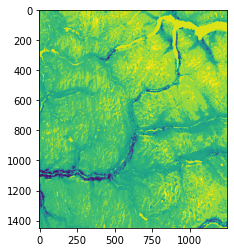

In [113]:
#Open data with rasterio
img = rasterio.open(data_path)
show(img, 0)

In [114]:
#Read the image
array = img.read()

#Create numpy array
array = np.array(array)

#Check shape
array.shape

(1, 1449, 1250)

In [115]:
#Read NRCAN raster to dataframe
nrcann = raster_to_dataframe(data_path)
nrcann.head()

,Band_1
0,13
1,13
2,13
3,13
4,13


In [116]:
#Rename column
nrcann = nrcann.rename(columns={'Band_1':'Class'})

#Print sum of classification types
print('Number of NRCANN Classes: ', nrcann.Class.nunique())

#Check which classifications are listed
print(nrcann.Class.value_counts())

Number of NRCANN Classes:  14
13    598412
16    544106
12    302032
11    135604
18    104449
19     74619
2      17481
1      14977
8      11318
5       5193
6       2101
14       768
0        188
10         2
Name: Class, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


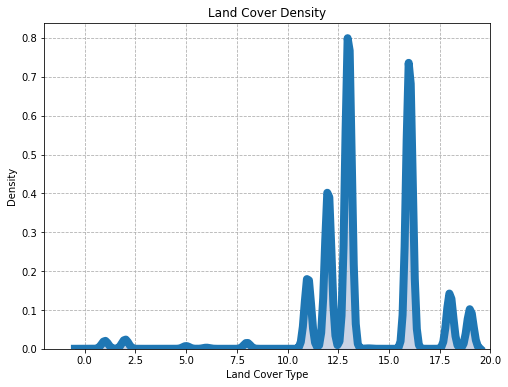

In [118]:
#Plot Class distribution
plt.figure(figsize=[8,6])
plt.grid(linestyle='--')
dp = sns.distplot(nrcann.Class, hist=False, kde_kws=dict(linewidth=8))
l1 = dp.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
dp.fill_between(x1,y1, color="#5471ab", alpha=0.3)
dp.set_xlim(-2, 20)
dp.set_xlabel("Land Cover Type")
dp.set_title("Land Cover Density")

#Save
fig = dp.get_figure()
fig.savefig('/content/drive/MyDrive/Labrador_classes.png')

In [119]:
#Double check shapes
data.shape, nrcann.shape

((1811250, 12), (1811250, 1))

In [120]:
#Merge nrcann with data
new_data = pd.concat([data, nrcann], axis = 1)
new_data.head()

,B06,B03,B12,B8A,B09,B04,B01,B08,B05,B02,B07,B11,Class
0,0.1012,0.0655,0.1368,0.1546,0.1852,0.0718,0.0702,0.1346,0.0950,0.0535,0.1176,0.1786,13
1,0.0548,0.0403,0.0789,0.0714,0.1794,0.0387,0.0771,0.0545,0.0484,0.0380,0.0567,0.0987,13
2,0.0593,0.0478,0.0778,0.0802,0.1531,0.0404,0.0723,0.0709,0.0553,0.0404,0.0642,0.0952,13
3,0.0596,0.0489,0.0748,0.0775,0.1350,0.0496,0.0660,0.0736,0.0522,0.0421,0.0692,0.1004,13
4,0.0740,0.0569,0.0875,0.1158,0.1287,0.0518,0.0612,0.1052,0.0752,0.0521,0.0928,0.1165,13


In [121]:
#Save merged data
data.to_csv('/content/drive/MyDrive/labrador_data.csv', index = False)